# Predicting Algerian Forest Fires with Machine Learning

In [1]:
from IPython.display import Image

Authors: Ingrid Chien, Johnson Du, Minori Jaggia, Leif Martin Saether Sunde

# Introduction

Starting in June 2012, the Bejaia and Sidi-Bel Abbes regions of Algeria experienced numerous wildfires that likely resulted from a heat wave. The fires burned throuh Algeria's pine and cork oak forests, damaging a total area of 295 square kilometers. 

### Purpose of Analysis

Do weather metrics in the Algerian regions determine the occureces of forest fires? How distinct are weather metrics for forest fires? How can we detect fires before they occur?

Our team uses machine learning to process features and predict whether or not a fire will occur based on significant attributes. Our model is based on data from Bejaia and Sidi-Bel Abbes, but we aim to build more robust and generalizable models that can help policy makers in different regions implement precautionary measures against fires before they strike. 

### Assumptions

In our analysis, we assume that the response variable is binary. The response variable is the class 'fire' or 'not fire.' We do not consider midway situations, such as fires that were close to ignition but utimately faded. We assume that our observations are unique instances with no extreme outliers. We also deduce that the samples are representative and large enough to make justifiable predictions.  

# The Data 

### Data Acquisition

The multivariate dataset is acquired from the UCI Machine Learning repository. It can be found at https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++.

The data contain a total of 244 instances for the two regions with 122 instances per region. There are 12 attributes, including date variables and weather metrics, that are measured from June 2012 to September 2012. Descriptions of the attributes can be found at the provided link. There are no missing values.

There are 2 repsonse classes, 'fire' and 'not fire.'

### Data Cleaning

The data is originally formatted as two stacked datasets where the top corresponds to Bejaia and the bottom correponds to Sidi-Bel Abbes. We combine them into one dataframe and create a 'Region' variable to distinguish regions. We reset the index and polish the column names for easy manipulation.

# Exploratory Data Analysis

We first examine the correlation between all pairs of attributes except 'date' and 'time'. We find that some variables are highly correlated with one another, such as BUI and DC. These findings are later reflected in our feature selection process in modeling to avoid multicollinearity. 



### Pairwise Correlations
Let us focus on the relationships for fire behavior indicies and fuel moisture codes. We expect to see correlations. For example, one fuel moisture code should heavily effect another fuel moisture code, as they capture similar information.

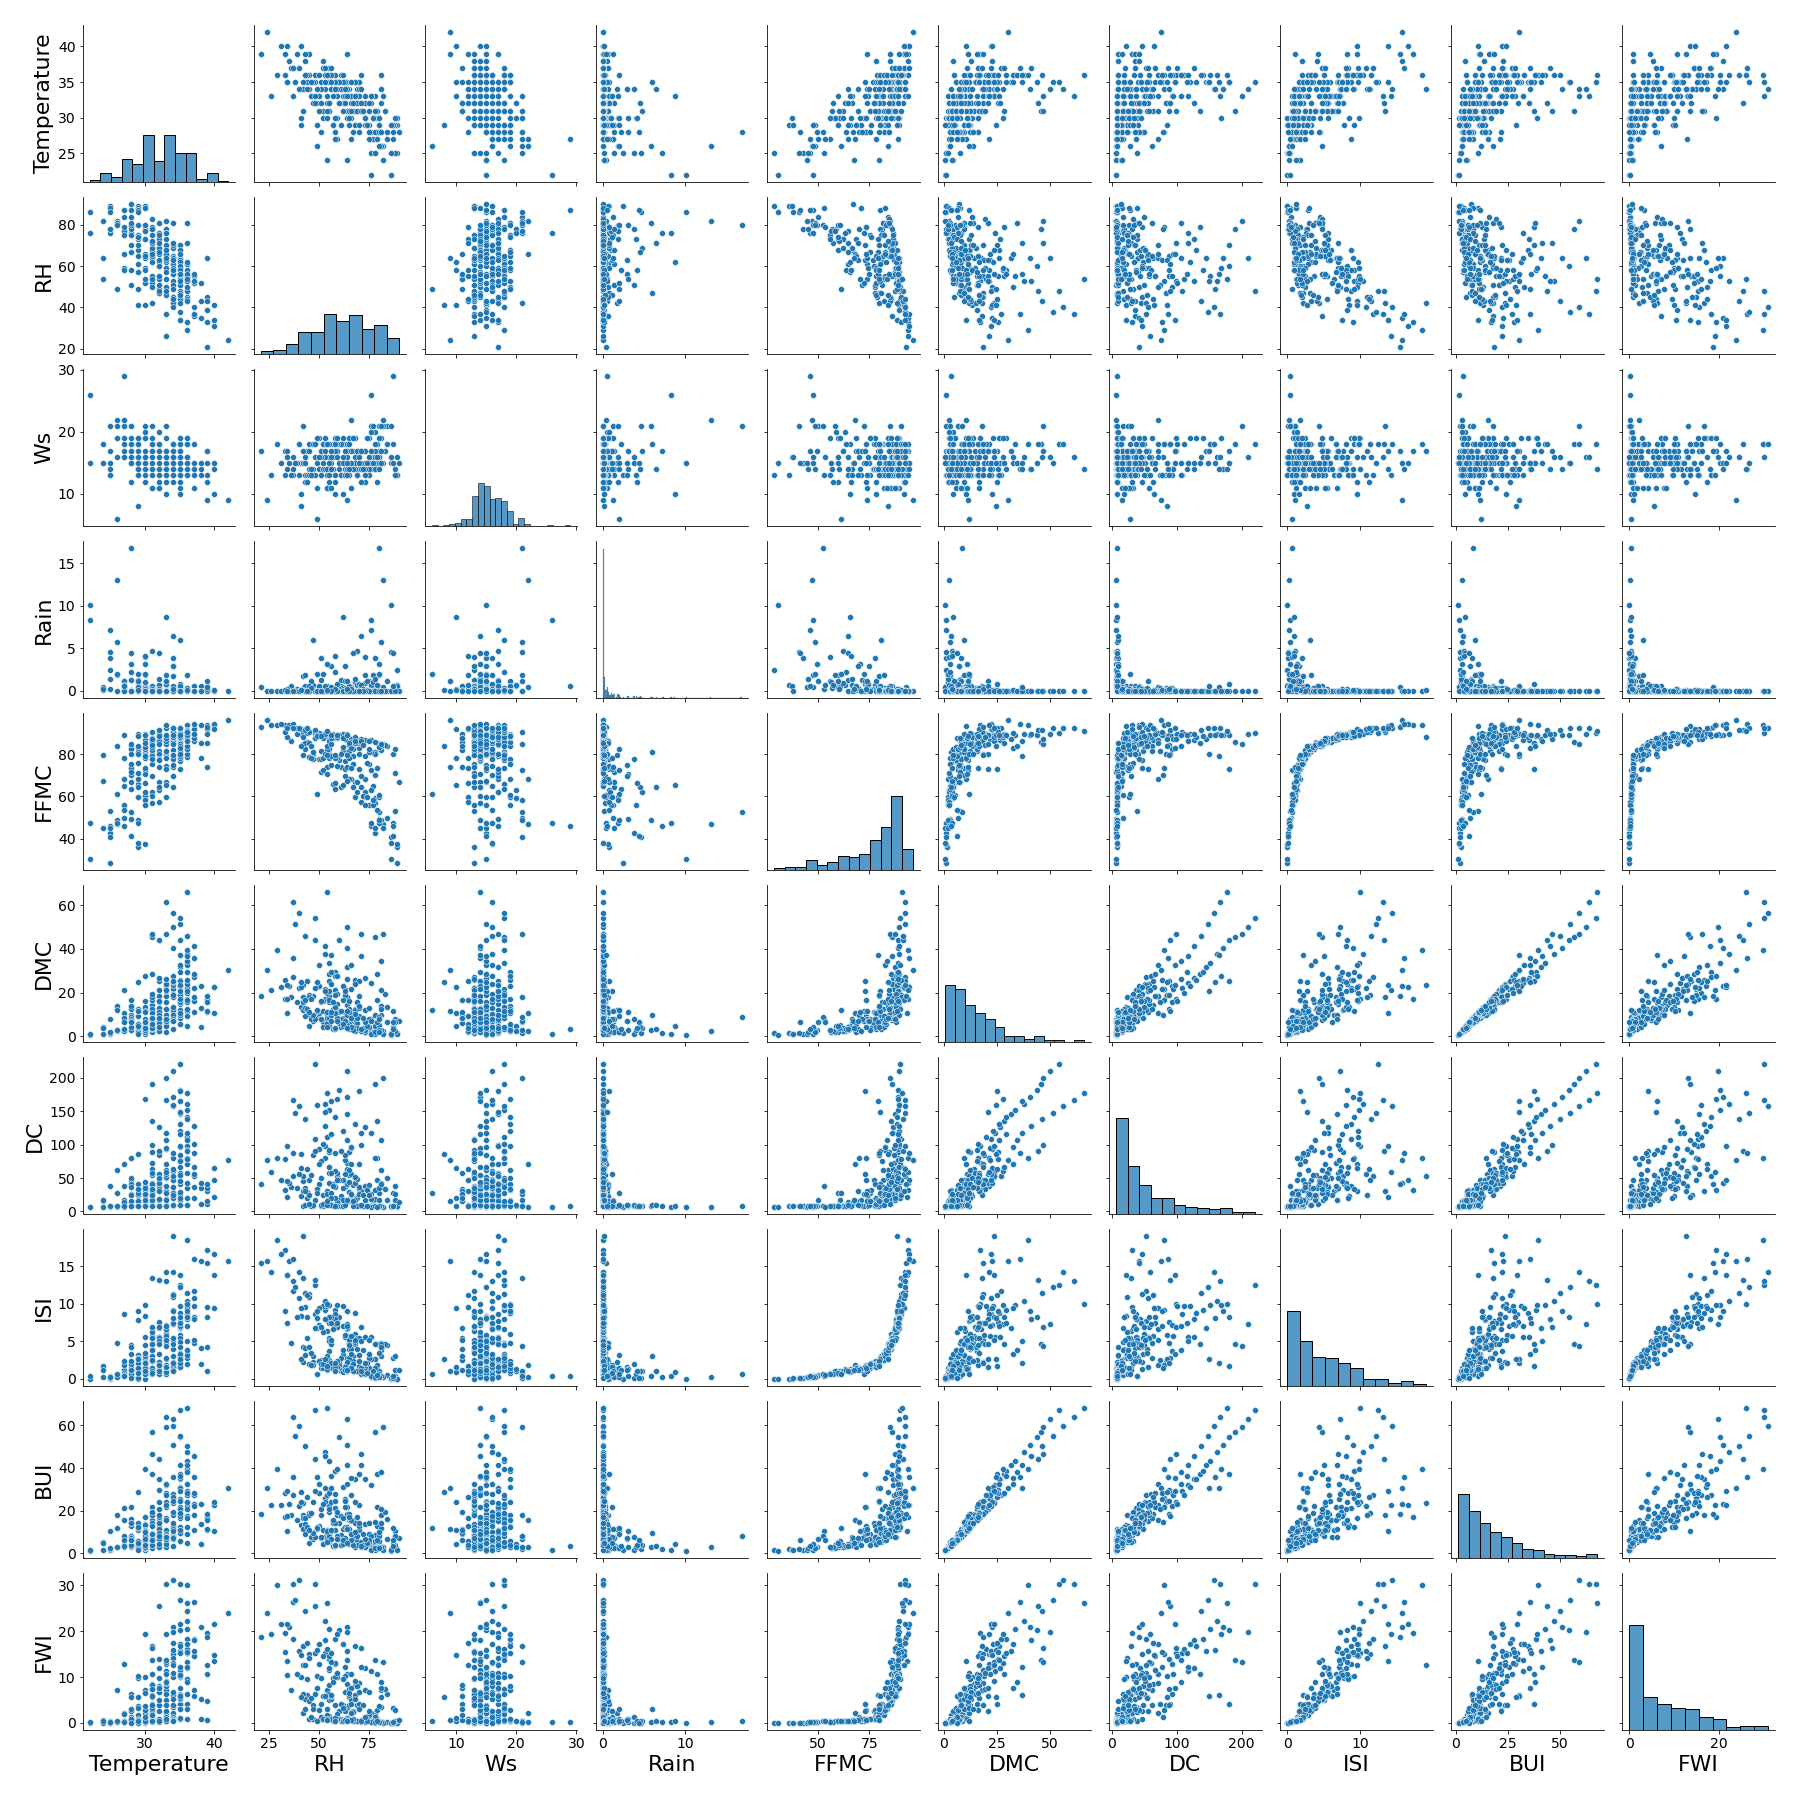

In [2]:
Image("figures/figure_1.png", width=600)

### Fire Behavior Indices
As expected, the variables rougly follow linear relationships and show positive correlation. It is no surprise that, for example, higher FWI induces higher BUI if larger fires are likely to have large buildups.

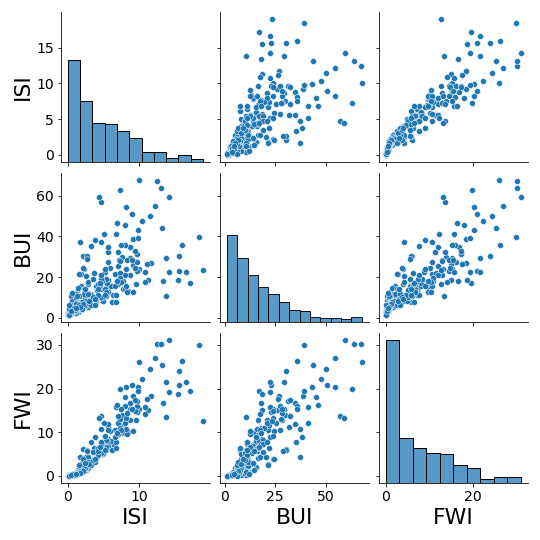

In [3]:
Image("figures/figure_2.png", width=400)

### Fuel Moisture Codes

DMC and DC roughly follow a linear relationship. The remaining relationships seems to be logarithmic, though the curves are quite sharp. As FFMC increases, DC stays consistent until around 80 FFMC where the spread increasees greatly. The FFMC is an inverse measure of moisture content for easily ignited surface litter and other cured fine fuels. Thus, it makes sense that FFMC increases as DC increases.

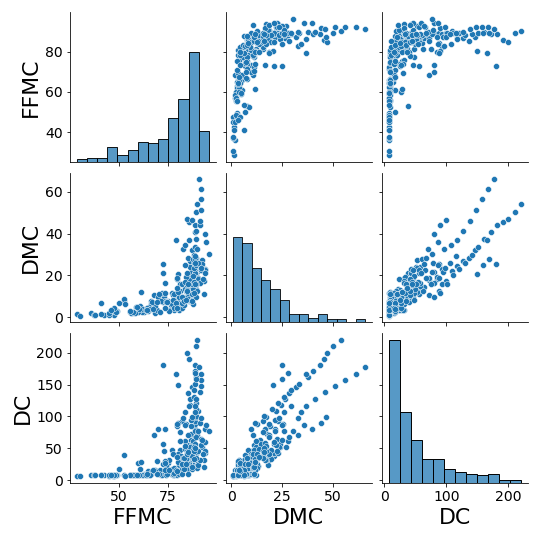

In [4]:
Image("figures/figure_3.png", width=400)

### FWI Distributions

Another interesting attribute is FWI. The distributions of FWI for 'fire' instances and 'not fire' instances drastically differ. If FWI is over about 8, then the data indicates we can be reasonably sure the instance is a 'fire'.

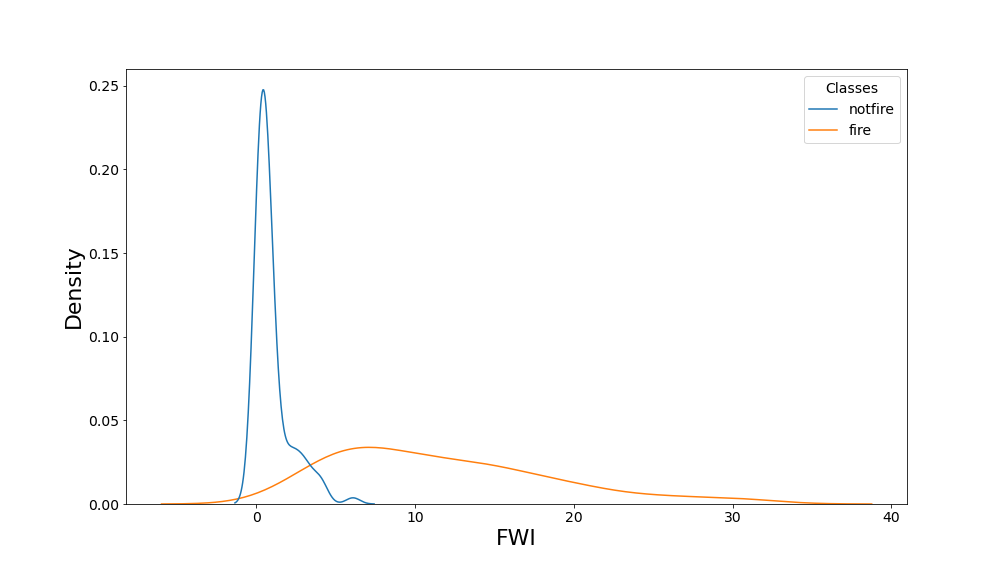

In [5]:
Image("figures/figure_4.png", width=600)



Additional EDA shows that about half of the fires occured in July 2012. Also, there exists outliers in the 'Rain' attribute, but they are kept in the data because we assume consecutive days of heavy rain are natural.



# Models

We build a random forest model and a logistic regression model to predict the occurence of forest fires.

### Random Forest Model

Our grid search cross validation searches the model and performs 10-fold cross validation on combinations of hyperparameters. The hyperparameters we consider are the number of trees to grow, and the maximum depth of each tree. Considering that our data is small and we have a small amount of features, it is reasonable to guess that we won't need a large number of trees, and we don't need to grow them very deep. 

During cross validation, we choose to evaluate the model with recall because we prioritize penalzing false negatives. We want to avoid predicting no fire when there is actually a fire. 

From the figure below, we conclude that recall is stable when we use more than 35 trees and that results are best when the trees are depth 1. The cross validation results shows that the best hyperparameter choices are 38 trees with maximum depths of 1.

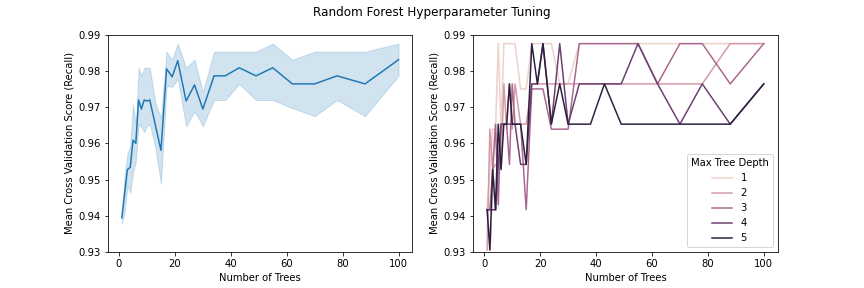

In [6]:
Image("figures/figure_5.png",  width=800)

The confusion matrix shows that our random forest model has great performance. The accuracy is 100%! Can we do better or worse with simple logistic regression?

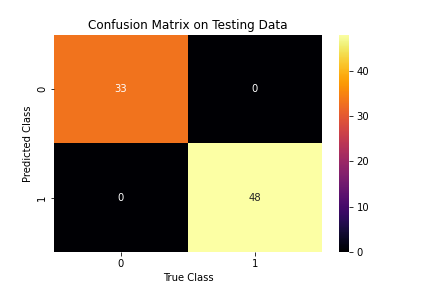

In [7]:
Image("figures/figure_6.png",  width=400)

**Accuracy: 1.0**

**Precision: 1.0**

**Recall: 1.0**

### Logistic Regression Model

By using logistic regression, we assume there is a possibility that the data can be linearly separated. Depending on which model does better, we make further assumptions about the nature of our data. If the random forest is superior, we believe the data is better suited for non linear algorithms. 

With previous EDA, we find that that DMC, DC, and BUI and highly correlated with one another. Only DMC is kept to avoid  multicollinearity. Notice how this step is skipped in the random forest model because the forest implicity performs feature subset selection. 

We use logistic regression with l2 regularization and the 'lbfgs' solver. Our logistic regression model also has great performance, though there are a few more errors compared to the random forest model. 

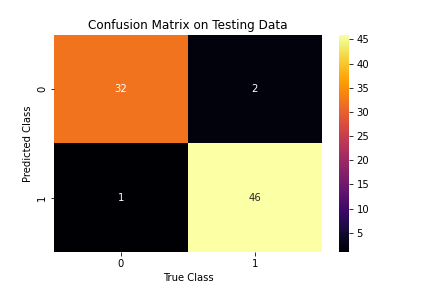

In [8]:
Image("figures/figure_7.png",  width=400)

**Accuracy: 0.9629629629629629**

**Precision: 0.9583333333333334**

**Recall: 0.9787234042553191**

To better undestand the model, let us examine the area under the ROC curve, which plots true positive rates against false positive rates for different thresholds.

Amazingly, the area under the curve is close to 1! Our linear classifier is almost perfect, which leads us to believe the data can be linearly separated. 

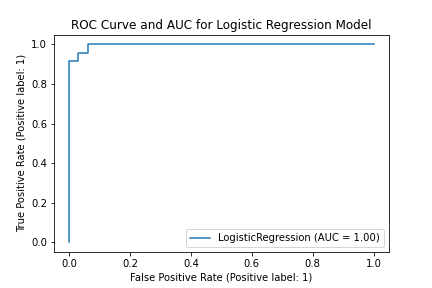

In [9]:
Image("figures/figure_8.png",  width=600)

### Interpreting Results and Model Comparison

Both models are extremely well-conditioned for the task of classifying forest fires. Even a simple logistic regression model with typical feature engineering achives a near perfect accuracy. Is it posisble that the data is inherently good for classification? Perhaps Algerian forest firest have particularly distinct features that make them easy to distinguish from regular forest conditions. From EDA, we see that most fires occured in July, leading us to believe that 'month' is a significant factor in determining fire occurence. 

The random forest outperforms the logistic model. This is expected because random forests are more expressive. The removal of correlated variables in the logistic model need not be the reason for poorer performance because they are calculated from kept features. The random forest succeeds by using a non linear split that cannot be represented by the logistic model.


Our models are conditioned to predict fires in regions of Algeria. It is unclear how the models will respond to forest fires in other locations. We aim to conduct further exploration by training our models with data from different locations with similar climates. We can monitor the models' variances and ask the question: Are Algerian forest fires easier to predict than other forest fires?

# Author Contributions


**Johnson Du**

- Responsible for `data_cleaning.ipynb`.
- Responsible for the random forest classifier model (`random_forest.ipynb`, etc.)
- Responsible for `restructure_data()` and `evaluate_model()` function in `tools\utils.py`.
- Responsible for writing tests for the util functions.
- Responsible for `Makefile`.

**Ingrid Chien**

- Responsible for the logistic regresion model (`random_forest.ipynb`, etc.).
- Responsible for the `normalize()` and `preprocess_data()` functions in `tools\utils.py`.
- Responsible for configuring `tools` as an installable package (`pyproj.toml`, `setup.py`, `setup.config`).
- Responsible for writing report in `main.ipynb`.


**Minori Jaggia**
- Responsible for parts of `EDA.ipynb`
- Responsible for `environment.yml`
- Responsible for creating jupyterbook, binder link, and configuring github actions